In [1]:
import pandas as pd
import numpy as np

#import unicode character database
import unicodedata
#import regular expression operations
import re

#import natural language toolkit
import nltk
from nltk.corpus import words
#import our aquire


#import our stopwords list
from nltk.corpus import stopwords
from copy import deepcopy


from textblob import TextBlob,Word
from emot.emo_unicode import EMOJI_UNICODE, EMOTICONS_EMO







import random

from datetime import date
import snscrape.modules.twitter as sntwitter

from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn_wordcloud import venn3_wordcloud,venn2_wordcloud
from wordcloud import WordCloud,ImageColorGenerator
from matplotlib_venn import venn3, venn3_circles,venn2_circles,venn2,venn2_unweighted





more_stopwords = ['like', 'im', 'think', 'dont', 'people', 'know', 'one', 'get', 'really','thing',
                  'would', 'time', 'type', 'make', 'friend', 'ive', 'much','amp','twitter',
                 'say', 'way', 'see', 'thing', 'want', 'thing', 'good', 'something', 'lot',
                  'also', 'go', 'always', 'even', 'well', 'someone','https','http','com','co',',',"'"]



stops=stopwords.words(['french','german','english','spanish','portuguese'])+ more_stopwords






pd.to_pickle(stops,'stopwords.pkl')










def stopfilter(text,stop_words_extend_reduce=["'"]):
    'we use symmetric difference so if a is already in stop words then it will be added to our third set else our third set will be missing it'
    #create oujr english stopwords list
    stops = set(pd.read_pickle('stopwords.pkl'))

   
    stop_words_extend_reduce=set(stop_words_extend_reduce)
    stops=stops.symmetric_difference(stop_words_extend_reduce)

    # stops=(stops|stop_words_extend)-exclude_words
    #another way
    
    filtered=list(filter((lambda x: x not in stops and len(x)>2), text.split()))
    filtered=' '.join(filtered)
 

    return filtered






# def basic_clean(text,regexfilter=r'[^a-z0-9\'\s]'):
#     '''   
#     Filters out all special characters if you need to edit then supply a new regex filter 
    
    
    
    
#     '''
#     #make a copy and begin to transform it
#     newtext = text.lower()

#     #encode into ascii then decode
#     newtext = unicodedata.normalize('NFKD', newtext)\
#     .encode('ascii', 'ignore')\
#     .decode('utf-8')

#     #use re.sub to remove special characters
#     newtext = re.sub(fr'{regexfilter}', ' ', newtext)

    
    


#     return newtext

    
# def lemmatizor(text,regexfilter=r'[^a-z0-9\'\s]'):
#     '''    
    
#       Takes text, tokenizes it, lemmatizes it
#       lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True),  lemmatized.split()))
#       needs to be commented out after the first run (up to modeling)
#       # lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True and (x in  total)), lemmatized.split()))
#       needs to be un commented commented
    
    
    
    
    
#     '''
#     total=list(pd.read_pickle('words.pkl'))
    

#     #make ready the lemmatizer object
#     newtext=tokenizer(text,regexfilter=regexfilter)
#     wnl = nltk.stem.WordNetLemmatizer()
#     lemmatized=split_apply_join(wnl.lemmatize,newtext)

#     # since the average word lenght in English is 4.7 characters we will apply a conservative estimate and drop any word that is larger than 8 characters as it is likely not a word
#     # we also recursivley took the set of all words generated then compared that to nltk.corpus.words.words() and used that list as filter this is where total comes from

#     # lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True and (x in  total)), lemmatized.split()))

#     lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True),  lemmatized.split()))

#     lemmafiltered=' '.join(lemmafiltered)
  
#     lemmafiltered=basic_clean(lemmafiltered,regexfilter=regexfilter)

#     return lemmafiltered







# Converting emojis to words
def convert_emojis(text):
    for emot in EMOJI_UNICODE:
        text = text.replace(emot, "_".join(EMOJI_UNICODE[emot].replace(",","").replace(":","").split()))
        text = text.replace(':','').replace('_',' ')
    return text
# Converting emoticons to words    
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        text = re.sub(re.escape(emot),EMOTICONS_EMO[emot],text)
    return text



def basic_clean(text,regexfilter=r'[^a-z0-9\'\s]'):
    '''   
    Filters out all special characters if you need to edit then supply a new regex filter 
    
    '''
    newtext = convert_emojis(convert_emoticons(text))
    
    #make a copy and begin to transform it
    newtext = newtext.lower()

    #encode into ascii then decode
    newtext = unicodedata.normalize('NFKD', newtext)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')

    #use re.sub to remove special characters
    newtext = re.sub(fr'{regexfilter}', ' ', newtext)

    return newtext

    
def lemmatizor(text,regexfilter=r'[^a-z0-9\'\s]'):
    '''    
    
      Takes text, tokenizes it, lemmatizes it
      lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True),  lemmatized.split()))
      needs to be commented out after the first run (up to modeling)
      # lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True and (x in  total)), lemmatized.split()))
      needs to be un commented commented
     
    '''
    total=list(pd.read_pickle('words.pkl'))
    
    # do basic clean on text and translate emojis/emoticons
    newtext=basic_clean(text,regexfilter=regexfilter)

    #make ready the lemmatizer object
    newtext=tokenizer(newtext,regexfilter=regexfilter)
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized=split_apply_join(wnl.lemmatize,newtext)

    # since the average word lenght in English is 4.7 characters we will apply a conservative estimate and drop any word that is larger than 8 characters as it is likely not a word
    # we also recursivley took the set of all words generated then compared that to nltk.corpus.words.words() and used that list as filter this is where total comes from

    # lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True and (x in  total)), lemmatized.split()))

    lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True),  lemmatized.split()))

    lemmafiltered=' '.join(lemmafiltered)
  
    # lemmafiltered=basic_clean(lemmafiltered,regexfilter=regexfilter)

    return lemmafiltered












    
    
    
def split_apply_join(funct,listobj):
    'helperfuction letters'

    mapped=map(funct, listobj)
    mapped=list(mapped)
    mapped=''.join(mapped)
  
    return mapped




def tokenizer(text,regexfilter=r'[^a-z0-9\'\s]'):
    ''' 
    For a large file just save it locally
    
    
    
    
    
    '''
    newtext=basic_clean(text,regexfilter=regexfilter)
    #make ready tokenizer object
    tokenize = nltk.tokenize.ToktokTokenizer()
    #use the tokenizer
    newtext = tokenize.tokenize(newtext, return_str=True)
    return newtext


In [2]:
tryagain=pd.read_pickle('tryagain.pkl')
tryagain.name.value_counts()


taylor swift         871
rihanna              784
katy perry           733
justin bieber        686
the countess         678
                    ... 
yordi rosado           1
ivete sangalo          1
nicolas vazquez        1
tata werneck           1
serginho groisman      1
Name: name, Length: 590, dtype: int64

In [3]:
# x=TextBlob('army').correct()
# print(x)

In [4]:

# count=0
# dflist=[]

# aggName={
# 'name':{},
# 'type':{},
# 'handle':{},
# 'date':{},
# 'likeCount':{},
#  'retweetCount':{},
# 'domain':{},
# 'i_e':{},
# 'n_s':{},
# 't_f':{},
# 'j_p':{},
# 'docs':{},
# 'lemmatized':{},
# 'freqTableCeleb':{},
# 'noon_21':{},
# 'fiveAm_noon':{},
# 'nightowl':{}
# }






# types=tryagain.groupby(['type','name'])    
# typekeys=list(types.groups.keys())

# for key in typekeys:
#    df=types.get_group(key).sort_values(by='date')
#    if len(df)<=49:##This is our filter for enough 
#         continue
#    else:
#     name=list(df['name'].unique())[0]
#     mbtype=list(df['type'].unique())[0]
#     handle=list(df['handle'].unique())[0]
#     date=list(df['date'].unique());#display(date)
#     likeCount=(df['likeCount'].unique()).sum()
#     retweetCount=(df['retweetCount'].unique()).sum()
#     domain=list(df['domain'].unique())[0]
#     i_e=df['i|e'].unique().tolist()[0]
#     n_s=df['n|s'].unique().tolist()[0]
#     t_f=df['t|f'].unique().tolist()[0]
#     j_p=df['j|p'].unique().tolist()[0]
#     docs=df['content'].unique()
    
    
    
#     # splitdocs=docs.split('')
    
    
#     lemma=[stopfilter(i) for i in [lemmatizor(d) for d in docs]]
#     lemma=[i.strip() for i in lemma if len(i)>=2]
#     full_list=" ".join(lemma).split()
#     full_list=[str(TextBlob(stopfilter(i)).correct()) for i in full_list]
 
    
    
    
#     valcounts=pd.Series(full_list).value_counts()
#     freqtable=valcounts
    
    
#     # valDf=pd.DataFrame(valcounts)
#     # #valDf=valDf[valDf[0]>2]# This is a filter for frequencies. I am turning it off
    
#     # keep=list(valDf.index)
#     # full_list=[i for i in full_list if i in keep]
#     # val_keep=[int(str(i).replace('[','').replace(']','').strip()) for i in valDf.values]
#     # freqtable=dict(zip(keep,val_keep))


#     aggName['name'].update({count:name})
#     aggName['type'].update({count:mbtype})
#     aggName['handle'].update({count:handle})
#     aggName['date'].update({count:date})
#     nightowlsum=0
#     pmsum=0
#     amsum=0
#     tot=0
#     for d in date:
#         if d.hour>=21:
#             nightowlsum+=1
#         elif d.hour>=12:
#             pmsum+=1
#         elif d.hour >=5:
#             amsum+=1
#         elif d.hour >=0:
#             nightowlsum+=1
#     tot=nightowlsum+pmsum+amsum 
#     aggName['noon_21'].update({count:float(f'{(pmsum/tot)*100:.1f}')})
#     aggName['fiveAm_noon'].update({count:float(f'{(amsum/tot)*100:.1f}')})
#     aggName['nightowl'].update({count:float(f'{(nightowlsum/tot)*100:.1f}')})
#     aggName['likeCount'].update({count:likeCount})
#     aggName['retweetCount'].update({count:retweetCount})
#     aggName['domain'].update({count:domain})
#     aggName['i_e'].update({count:i_e})
#     aggName['n_s'].update({count:n_s})
#     aggName['t_f'].update({count:t_f})
#     aggName['j_p'].update({count:j_p})
#     aggName['docs'].update({count:docs})
#     aggName['lemmatized'].update({count:full_list})
#     aggName['freqTableCeleb'].update({count:freqtable})
   
#     count+=1


    




   


In [5]:


aggName_df=pd.read_pickle('aggName_wo_emojis.pkl')
aggName_df=aggName_df[[	'type'		,	'likeCount',	'retweetCount',	'domain'	,	'lemmatized'	]]



In [6]:
divisor=sum(aggName_df.groupby('domain').count().type)
domainratio=round((((aggName_df.groupby('domain').count().type)/divisor)*100),2)
domainratio=pd.Series(domainratio)
index=list(domainratio.index)
vals=list(domainratio.values);vals
domainmap=dict(zip(index,vals))
domainmap

{'analyst': 16.49, 'diplomat': 22.68, 'explorer': 40.21, 'sentinel': 20.62}

In [7]:
typlist=[]
ratiolist=[]
##genpop from 16personality typs.com
typlist.append('INTJ');ratiolist.append(2.1)
typlist.append('INTP');ratiolist.append(3.3)
typlist.append('ENTJ');ratiolist.append(1.8)
typlist.append('ENTP');ratiolist.append(3.2)
typlist.append('INFJ');ratiolist.append(1.5)
typlist.append('INFP');ratiolist.append(4.4)
typlist.append('ENFJ');ratiolist.append(2.5)
typlist.append('ENFP');ratiolist.append(8.1)
typlist.append('ISTJ');ratiolist.append(11.6)
typlist.append('ISFJ');ratiolist.append(13.8)
typlist.append('ESTJ');ratiolist.append(8.7)
typlist.append('ESFJ');ratiolist.append(12)
typlist.append('ISTP');ratiolist.append(5.4)
typlist.append('ISFP');ratiolist.append(8.8)
typlist.append('ESTP');ratiolist.append(4.3)
typlist.append('ESFP');ratiolist.append(8.5)


typlist=[i.lower() for i in typlist];display(typlist)
genpopdict=dict(zip(typlist,ratiolist));display(genpopdict)


['intj',
 'intp',
 'entj',
 'entp',
 'infj',
 'infp',
 'enfj',
 'enfp',
 'istj',
 'isfj',
 'estj',
 'esfj',
 'istp',
 'isfp',
 'estp',
 'esfp']

{'intj': 2.1,
 'intp': 3.3,
 'entj': 1.8,
 'entp': 3.2,
 'infj': 1.5,
 'infp': 4.4,
 'enfj': 2.5,
 'enfp': 8.1,
 'istj': 11.6,
 'isfj': 13.8,
 'estj': 8.7,
 'esfj': 12,
 'istp': 5.4,
 'isfp': 8.8,
 'estp': 4.3,
 'esfp': 8.5}

In [8]:

domains=aggName_df.groupby(['domain','type'])
domkeys=domains.groups.keys()

retweetCount=[]
mtype=[]
count=0
domaindict={
'domain':{},	
'likeCount':{},	
'retweetCount':{},	
'type':{},	
'lemmatized':{}

}

for dk in domkeys:
        lemmas=[]
        likeCount=[]
        cur=domains.get_group(dk)
        # display(cur)
        for i in range(0,len(cur)):
                lemmas.extend(cur.lemmatized.values[i].split())
           
                # likeCount.extend(int(list(cur.likeCount)[i]))
                # retweetCount.extend(int(list(cur.retweetCount)[i]))
                

        lemmas=[i.strip() for i in lemmas if (i.isalpha()==True and (i[0]!=i[1]) and len(i)>2)]
        domain=set(cur.domain)
        
      
        mtype=set(cur.type)
        if (len(mtype) or domain)>1:
                print(mtype)
        else:
                
                domain=list(domain)[0]
                mtype=list(mtype)[0]
                likeCount=cur.likeCount.sum()
                retweetCount=cur.retweetCount.sum()
                lemmas.sort()
              
                domaindict['type'].update({count:mtype})
                domaindict['likeCount'].update({count:likeCount})
                domaindict['retweetCount'].update({count:retweetCount})
                domaindict['domain'].update({count:domain})
                domaindict['lemmatized'].update({count:lemmas})
                count+=1

domains=pd.DataFrame(domaindict);display(domains)

genpopdict=dict(zip(typlist,ratiolist));display(genpopdict)
domains['genPopRatio']=domains.type.map(genpopdict);display(domains)




domains=domains.groupby(['domain'])
domkeys=domains.groups.keys()
biglemmalist=[]
retweetCount=[]
mtype=[]
count=0
domaindict={
'domain':{},	
'likeCount':{},	
'retweetCount':{},	
'type':{},	
'lemmatized':{},
'corpusLen':{},
'uniqueCorpus':{},
'uniqueCorpusLen':{},
'genPopRatio':{}
}

for dk in domkeys:
        lemmas=[]
        likeCount=[]
        cur=domains.get_group(dk)
        # display(cur)
        for i in range(0,len(cur)):
                lemmas.extend(cur.lemmatized.values[i])
           
                # likeCount.extend(int(list(cur.likeCount)[i]))
                # retweetCount.extend(int(list(cur.retweetCount)[i]))
                

        lemmas=[i.strip() for i in lemmas if (i.isalpha()==True and (i[0]!=i[1]) and len(i)>2)]
        domain=set(cur.domain)
        
      
        mtype=set(cur.type)
        if (len(domain))>1:
                print(f'problemwith: {domain}')
        else:
                
                domain=list(domain)[0]
            
                likeCount=cur.likeCount.sum()
                retweetCount=cur.retweetCount.sum()
                lemmas.sort()
                biglemmalist.extend(lemmas)
                domaindict['type'].update({count:mtype})
                domaindict['likeCount'].update({count:likeCount})
                domaindict['retweetCount'].update({count:retweetCount})
                domaindict['domain'].update({count:domain})
                domaindict['lemmatized'].update({count:str(lemmas).strip().strip(']').strip('[').strip().replace(' ',',').replace(',,',',')})
                domaindict['corpusLen'].update({count:len(lemmas)})
                domaindict['uniqueCorpus'].update({count:set(lemmas)})
                domaindict['uniqueCorpusLen'].update({count:len(set(lemmas))})
                domaindict['genPopRatio'].update({count:float(cur.genPopRatio.unique().sum())})
          

                
                count+=1


# biglemmalist

domains=pd.DataFrame(domaindict);display(domains)




,domain,likeCount,retweetCount,type,lemmatized
0,analyst,76880693,9205298,entj,"[aback, abandons, abbassov, abbot, abc, abc, a..."
1,analyst,154844536,17253386,entp,"[aback, abangan, abba, abba, abba, abbas, abba..."
2,analyst,96056512,9084509,intj,"[abbey, abbott, abc, abc, abccant, abdala, abi..."
3,analyst,8245600,659303,intp,"[abbot, abe, abe, abe, abhay, abi, abi, abi, a..."
4,diplomat,98757967,16745102,enfj,"[abandon, abba, abbey, abbott, abc, abc, abc, ..."
5,diplomat,365756713,51714069,enfp,"[abandon, abangan, abba, abba, abba, abbey, ab..."
6,diplomat,52316161,11543832,infj,"[abacus, abangan, abba, abbies, abdelhak, aber..."
7,diplomat,21250052,3497015,infp,"[abadia, abel, abel, able, able, able, able, a..."
8,explorer,306420544,25465891,esfp,"[abandon, abandone, abangan, abaya, abbad, abb..."
9,explorer,106596742,11065769,estp,"[abc, abc, abc, abc, abc, abc, abc, abc, abc, ..."


{'intj': 2.1,
 'intp': 3.3,
 'entj': 1.8,
 'entp': 3.2,
 'infj': 1.5,
 'infp': 4.4,
 'enfj': 2.5,
 'enfp': 8.1,
 'istj': 11.6,
 'isfj': 13.8,
 'estj': 8.7,
 'esfj': 12,
 'istp': 5.4,
 'isfp': 8.8,
 'estp': 4.3,
 'esfp': 8.5}

,domain,likeCount,retweetCount,type,lemmatized,genPopRatio
0,analyst,76880693,9205298,entj,"[aback, abandons, abbassov, abbot, abc, abc, a...",1.8
1,analyst,154844536,17253386,entp,"[aback, abangan, abba, abba, abba, abbas, abba...",3.2
2,analyst,96056512,9084509,intj,"[abbey, abbott, abc, abc, abccant, abdala, abi...",2.1
3,analyst,8245600,659303,intp,"[abbot, abe, abe, abe, abhay, abi, abi, abi, a...",3.3
4,diplomat,98757967,16745102,enfj,"[abandon, abba, abbey, abbott, abc, abc, abc, ...",2.5
5,diplomat,365756713,51714069,enfp,"[abandon, abangan, abba, abba, abba, abbey, ab...",8.1
6,diplomat,52316161,11543832,infj,"[abacus, abangan, abba, abbies, abdelhak, aber...",1.5
7,diplomat,21250052,3497015,infp,"[abadia, abel, abel, able, able, able, able, a...",4.4
8,explorer,306420544,25465891,esfp,"[abandon, abandone, abangan, abaya, abbad, abb...",8.5
9,explorer,106596742,11065769,estp,"[abc, abc, abc, abc, abc, abc, abc, abc, abc, ...",4.3


,domain,likeCount,retweetCount,type,lemmatized,corpusLen,uniqueCorpus,uniqueCorpusLen,genPopRatio
0,analyst,336027341,36202496,"{entj, entp, intp, intj}","'aback','aback','abandons','abangan','abba','a...",253672,"{niece, reris, computer, louie, rohhad, plotli...",22449,10.4
1,diplomat,538080893,83500018,"{infp, infj, enfp, enfj}","'abacus','abadia','abandon','abandon','abangan...",318604,"{niece, rebic, computer, louie, mercurio, moho...",23906,16.5
2,explorer,843492532,88378783,"{estp, istp, isfp, esfp}","'abandon','abandone','abangan','abaya','abbad'...",517405,"{niece, panvel, tnonme, ronwood, computer, lou...",32350,27.0
3,sentinel,303051322,33679731,"{isfj, istj, estj, esfj}","'abandon','abandon','abangan','abba','abbak','...",305864,"{svs, niece, computer, audia, fcsion, fede, ka...",22373,46.1


In [9]:



combineddict={
'domain':{},	
'likeCount':{},	
'retweetCount':{},	
'type':{},	
'lemmatized':{},
'corpusLen':{},
'uniqueCorpus':{},
'uniqueCorpusLen':{},
'genPopRatio':{}

}
count=len(domains)

tset=set()
[tset.update(i) for i in list(domains.type)]
combinedunique=set()
[combinedunique.update(i) for i in list(domains.uniqueCorpus)]

display(tset)
(combinedunique)
likeCount=domains.likeCount.sum();display(likeCount)
retweetCount=domains.retweetCount.sum();display(retweetCount)
corpusLen=domains.corpusLen.sum();display(corpusLen)
uniqueCorpusLen=domains.uniqueCorpusLen.sum();display(uniqueCorpusLen)
lemmatized=str(','.join(list(domains.lemmatized))).strip().strip(']').strip('[').replace(',,','').strip()
genPopRatio=sum(domains.genPopRatio)







combineddict['type'].update({count:tset})
combineddict['likeCount'].update({count:likeCount})
combineddict['retweetCount'].update({count:retweetCount})
combineddict['domain'].update({count:'domainUnion'})
combineddict['lemmatized'].update({count:lemmatized})
combineddict['corpusLen'].update({count:corpusLen})
combineddict['uniqueCorpus'].update({count:combinedunique})
combineddict['uniqueCorpusLen'].update({count:uniqueCorpusLen})



combineddict['genPopRatio'].update({count:genPopRatio})
combineddict=pd.DataFrame(combineddict);display(combineddict)

domains=pd.concat([domains,combineddict])
domains['freqtable']=domains.lemmatized.map(lambda x:dict(pd.Series([i.strip().strip(']').strip('[').strip('"').strip("'").strip() for i in (x.split(','))]).value_counts()))
domains['twitterRatio']=domains.domain.map(domainmap)
domains.twitterRatio.iloc[4]=(domains.twitterRatio.sum())
domains
display(domains)


{'enfj',
 'enfp',
 'entj',
 'entp',
 'esfj',
 'esfp',
 'estj',
 'estp',
 'infj',
 'infp',
 'intj',
 'intp',
 'isfj',
 'isfp',
 'istj',
 'istp'}

2020652088

241761028

1395545

101078

,domain,likeCount,retweetCount,type,lemmatized,corpusLen,uniqueCorpus,uniqueCorpusLen,genPopRatio
4,domainUnion,2020652088,241761028,"{infp, estp, istj, entp, infj, enfp, entj, isf...","'aback','aback','abandons','abangan','abba','a...",1395545,"{svs, niece, reris, panvel, tnonme, rebic, com...",101078,100.0


/var/folders/tc/rqcbqynd6g96v17vbqppznm40000gn/T/ipykernel_72403/2758479601.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domains.twitterRatio.iloc[4]=(domains.twitterRatio.sum())


,domain,likeCount,retweetCount,type,lemmatized,corpusLen,uniqueCorpus,uniqueCorpusLen,genPopRatio,freqtable,twitterRatio
0,analyst,336027341,36202496,"{entj, entp, intp, intj}","'aback','aback','abandons','abangan','abba','a...",253672,"{niece, reris, computer, louie, rohhad, plotli...",22449,10.4,"{'annoyed': 10921, 'uneasy': 10919, 'hesitant'...",16.49
1,diplomat,538080893,83500018,"{infp, infj, enfp, enfj}","'abacus','abadia','abandon','abandon','abangan...",318604,"{niece, rebic, computer, louie, mercurio, moho...",23906,16.5,"{'annoyed': 13660, 'uneasy': 13659, 'hesitant'...",22.68
2,explorer,843492532,88378783,"{estp, istp, isfp, esfp}","'abandon','abandone','abangan','abaya','abbad'...",517405,"{niece, panvel, tnonme, ronwood, computer, lou...",32350,27.0,"{'annoyed': 28288, 'uneasy': 28284, 'hesitant'...",40.21
3,sentinel,303051322,33679731,"{isfj, istj, estj, esfj}","'abandon','abandon','abangan','abba','abbak','...",305864,"{svs, niece, computer, audia, fcsion, fede, ka...",22373,46.1,"{'annoyed': 15899, 'uneasy': 15897, 'hesitant'...",20.62
4,domainUnion,2020652088,241761028,"{infp, estp, istj, entp, infj, enfp, entj, isf...","'aback','aback','abandons','abangan','abba','a...",1395545,"{svs, niece, reris, panvel, tnonme, rebic, com...",101078,100.0,"{'annoyed': 68768, 'uneasy': 68759, 'hesitant'...",100.00


In [10]:
domains.columns
domains.dtypes

domain              object
likeCount            int64
retweetCount         int64
type                object
lemmatized          object
corpusLen            int64
uniqueCorpus        object
uniqueCorpusLen      int64
genPopRatio        float64
freqtable           object
twitterRatio       float64
dtype: object

In [11]:

tochart=domains[['domain','genPopRatio','twitterRatio']]





tochart['abs_diff']=abs(tochart.twitterRatio-tochart.genPopRatio)

tochart=tochart.iloc[:-1 , :]


/var/folders/tc/rqcbqynd6g96v17vbqppznm40000gn/T/ipykernel_72403/1002768140.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tochart['abs_diff']=abs(tochart.twitterRatio-tochart.genPopRatio)


In [12]:


tochart.sort_values(by='abs_diff',ascending=False,inplace=True)
tochart=tochart[['genPopRatio','twitterRatio','abs_diff']]
tochart=tochart


/var/folders/tc/rqcbqynd6g96v17vbqppznm40000gn/T/ipykernel_72403/894917211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tochart.sort_values(by='abs_diff',ascending=False,inplace=True)


In [13]:
tochart.index=domains.domain[:-1]


In [14]:

styledf=tochart.T.style.background_gradient(cmap='Blues_r',axis=1)
styledf

domain,analyst,diplomat,explorer,sentinel
genPopRatio,46.100000,27.000000,16.500000,10.400000
twitterRatio,20.620000,40.210000,22.680000,16.490000
abs_diff,25.480000,13.210000,6.180000,6.090000


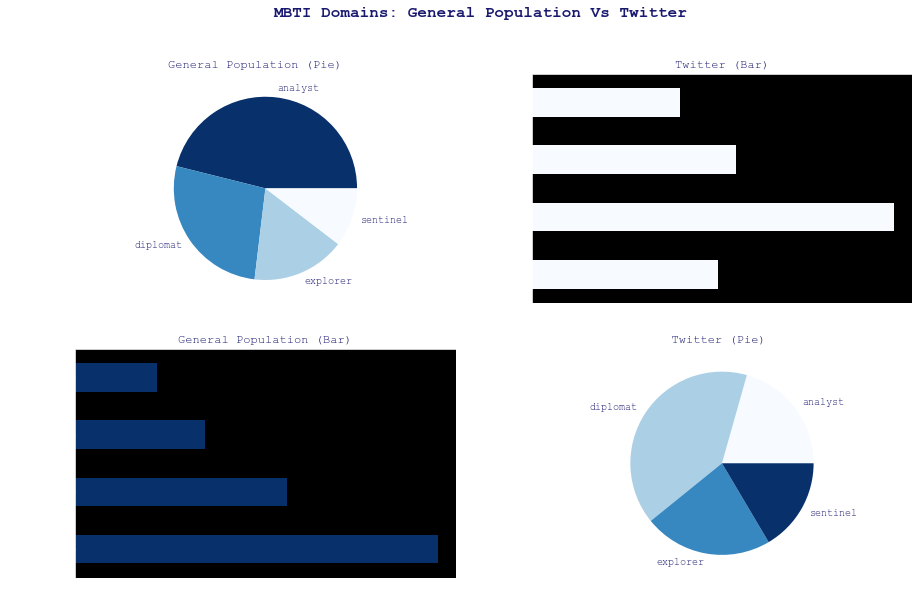

'Summary'

domain,analyst,diplomat,explorer,sentinel
genPopRatio,46.100000,27.000000,16.500000,10.400000
twitterRatio,20.620000,40.210000,22.680000,16.490000
abs_diff,25.480000,13.210000,6.180000,6.090000


In [15]:
plt.rcParams.update({'figure.facecolor':'white',"lines.linewidth":.5,'font.family':'monospace','font.monospace':'Courier New','text.color':'midnightblue','lines.markersize': 2.0})

tochart.sort_values(by='genPopRatio',ascending=False,inplace=True)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)
m=.75
fig = plt.figure(constrained_layout=False,figsize=(m*20,m*12.361))

gs = GridSpec(2, 2, figure=fig)

# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))



plt.suptitle('MBTI Domains: General Population Vs Twitter',fontsize=16,weight='demibold')





ax1 = fig.add_subplot(gs[0, 0])
kwargs1={'title':'General Population (Pie)   ','ax':ax1,'legend':False,'ylabel':'',   'cmap':'Blues_r'}

tochart.plot.pie(y='genPopRatio',**kwargs1)



ax2 = fig.add_subplot(gs[1, 1])

kwargs2={'title':'  Twitter (Pie)   ','ax':ax2,'legend':False,'ylabel':'',   'cmap':'Blues'}
tochart.plot.pie(y='twitterRatio',**kwargs2)


ax3 = fig.add_subplot(gs[0,1])
kwargs3={'ax':ax3,'legend':False,'title':'Twitter (Bar)',   'cmap':'Blues'}

tochart.sort_index().plot.barh(y='twitterRatio',**kwargs3)




ax4 = fig.add_subplot(gs[1, 0])
kwargs4={'ax':ax4,'legend':False,'title':'General Population (Bar)',   'cmap':'Blues_r'}
tochart.sort_index().plot.barh(y='genPopRatio',**kwargs4)

plt.show()




fig.suptitle("GridSpec")
format_axes(fig)

plt.show()




display('Summary',styledf)


In [16]:

pd.to_pickle(domains,'domains.pkl')
domains=pd.read_pickle('domains.pkl')
   
domainlist=domains.domain.to_list()

domainlist=['analyst', 'diplomat', 'explorer', 'sentinel']

In [17]:
# topLevelGroups=['type',
# 'domain',
# 'i_e',
# 'n_s',
# 't_f',
# 'j_p']
# grudict={i:{} for i in topLevelGroups}


# topLevelGroupsDflist=[]

# for gru in topLevelGroups:
  

#     typegroups=aggName_df.groupby(gru)

#     aggType ={
#     'names':{},
#     'type':{},
#     'handles':{},
#     'dates':{},
#     'likeCount':{},
#     'retweetCount':{},
#     'domain':{},
#     'i_e':{},
#     'n_s':{},
#     't_f':{},
#     'j_p':{},
#     'docs':{},
#     'lemmatized':{},
#     'freqTableGroup':{},
#     'noon_21':{},
#     'fiveAm_noon':{},
#     'nightowl':{}
#     }
   



#     typekeys=typegroups.groups.keys()
#     count=0
#     for key in typekeys:

      

        
#         df=typegroups.get_group(key)

#         noon_21=df.noon_21
#         fiveAm_noon=df.fiveAm_noon
#         nightowl=df.nightowl
#         noon_21=float(f'{(noon_21/len(noon_21)).sum():.1f}')
#         fiveAm_noon=float(f'{(fiveAm_noon/len(fiveAm_noon)).sum():.1f}')
#         nightowl=float(f'{(nightowl/len(nightowl)).sum():.1f}')
    
#         aggType['names'].update({count:df.name.unique()})
    
#         aggType['handles'].update({count:df.handle.unique()})
#         aggType['dates'].update({count:df.date.values})

#         aggType['noon_21'].update({count:noon_21})
#         aggType['fiveAm_noon'].update({count:fiveAm_noon})
#         aggType['nightowl'].update({count:nightowl})
#         aggType['likeCount'].update({count:likeCount.sum()})
#         aggType['retweetCount'].update({count:retweetCount.sum()})
#         aggType['domain'].update({count:set(df.domain.unique())})
#         aggType['type'].update({count:set(df.type.unique())})
#         aggType['i_e'].update({count:set(df.i_e.unique())})
#         aggType['n_s'].update({count:set(df.n_s.unique())})
#         aggType['t_f'].update({count:set(df.t_f.unique())})
#         aggType['j_p'].update({count:set(df.j_p.unique())})
#         aggType['docs'].update({count:df.docs.values})
#         lemmatized=df.lemmatized.to_list()
#         strings=str(lemmatized).replace('[','').replace(']','').replace("'",'').replace('"','').strip().split(',')
#         freqtable=dict(pd.Series(strings).value_counts())   
#         aggType['lemmatized'].update({count:lemmatized})
#         aggType['freqTableGroup'].update({count:freqtable})
        
        
#         grudict[f'{gru}'].update({key:pd.DataFrame(aggType)})
#         count+=1





In [18]:
# typelist=[]
# for key in grudict['type'].keys():
#     print(key)
#     typelist.append(grudict['type'].get(key).freqTableGroup.values[0])

# keyset=set()

# [keyset.update(i.keys()) for i in typelist]


# bigdict={i:[] for i in keyset}
# for d in typelist:
#     for i,v in d.items():
#         bigdict[i].append(v)
# [bigdict.update({i:sum(bigdict[i])}) for i in (bigdict.keys())]
# words=pd.Series(bigdict)

# wordslist=[]
# collist=[]
# for key in grudict['type'].keys():

#     wordslist.append(pd.Series(grudict['type'].get(key).freqTableGroup.values[0]))
#     collist.append(key)
# wordslist.append(words)
# collist.append('combined')
# wordslist.reverse()
# collist.reverse()

# word_counts = (pd.concat(wordslist, axis=1, sort=True)
#                 .set_axis(collist, axis=1, inplace=False)
#                 .fillna(0)
#                 .apply(lambda s: s.astype(int)))

# word_counts.head()
# percentlist=[]
# for i in list(set(word_counts.columns)-{'combined'}):
#     word_counts[f'p_{i}']=word_counts[i]/word_counts.combined
#     percentlist.append(f'p_{i}')
# word_counts[percentlist].head(20).plot.barh(stacked=True)

# [print(i) for i in wordslist]




In [19]:
domains

,domain,likeCount,retweetCount,type,lemmatized,corpusLen,uniqueCorpus,uniqueCorpusLen,genPopRatio,freqtable,twitterRatio
0,analyst,336027341,36202496,"{entj, entp, intp, intj}","'aback','aback','abandons','abangan','abba','a...",253672,"{niece, reris, louie, computer, rohhad, plotli...",22449,10.4,"{'annoyed': 10921, 'uneasy': 10919, 'hesitant'...",16.49
1,diplomat,538080893,83500018,"{enfp, infj, infp, enfj}","'abacus','abadia','abandon','abandon','abangan...",318604,"{niece, rebic, louie, computer, mercurio, moho...",23906,16.5,"{'annoyed': 13660, 'uneasy': 13659, 'hesitant'...",22.68
2,explorer,843492532,88378783,"{estp, istp, isfp, esfp}","'abandon','abandone','abangan','abaya','abbad'...",517405,"{niece, panvel, tnonme, ronwood, computer, lou...",32350,27.0,"{'annoyed': 28288, 'uneasy': 28284, 'hesitant'...",40.21
3,sentinel,303051322,33679731,"{esfj, istj, estj, isfj}","'abandon','abandon','abangan','abba','abbak','...",305864,"{svs, niece, computer, audia, fcsion, fede, ka...",22373,46.1,"{'annoyed': 15899, 'uneasy': 15897, 'hesitant'...",20.62
4,domainUnion,2020652088,241761028,"{estp, istj, entp, infj, enfp, entj, isfp, isf...","'aback','aback','abandons','abangan','abba','a...",1395545,"{svs, niece, reris, tnonme, panvel, rebic, com...",101078,100.0,"{'annoyed': 68768, 'uneasy': 68759, 'hesitant'...",100.00


In [20]:



# plt.rcParams.keys() 
#uncomment above to see the rcParams as they currently stand
    


In [21]:
        # 'font.fantasy': ['Chicago',
        #                    'Charcoal',
        #                    'Impact',
        #                    'Western',
        #                    'Humor Sans',
        #                    'xkcd',
        #                    'fantasy'],
        #   'font.monospace': ['DejaVu Sans Mono',
        #                      'Bitstream Vera Sans Mono',
        #                      'Computer Modern Typewriter',
        #                      'Andale Mono',
        #                      'Nimbus Mono L',
        #                      'Courier New',
        #                      'Courier',
        #                      'Fixed',
        #                      'Terminal',
        #                      'monospace'],


from matplotlib.font_manager import FontProperties

font = FontProperties()




from itertools import combinations
combos=list(combinations(domainlist,2))

combos

[('analyst', 'diplomat'),
 ('analyst', 'explorer'),
 ('analyst', 'sentinel'),
 ('diplomat', 'explorer'),
 ('diplomat', 'sentinel'),
 ('explorer', 'sentinel')]

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                         Analyst vs Diplomat

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


intersection set length:
11429
intersection frequency set length:
528789
union set length:
34926
union frequency set length:
572276
intersection freq divided by union freq percent:
92.40%
symmetric diff freq divided by union freq percent (words not in intersection):
7.60%
unique to analyst freq:
3.63% 
unique to diplomat freq:
3.97% 
Abs diff unique ratio from analyst and diplomat:
0.35% 
analyst freq contribution to intersection:
44.05% 
diplomat freq contribution to intersection:
55.95% 




 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                         Analyst vs Explorer

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


int

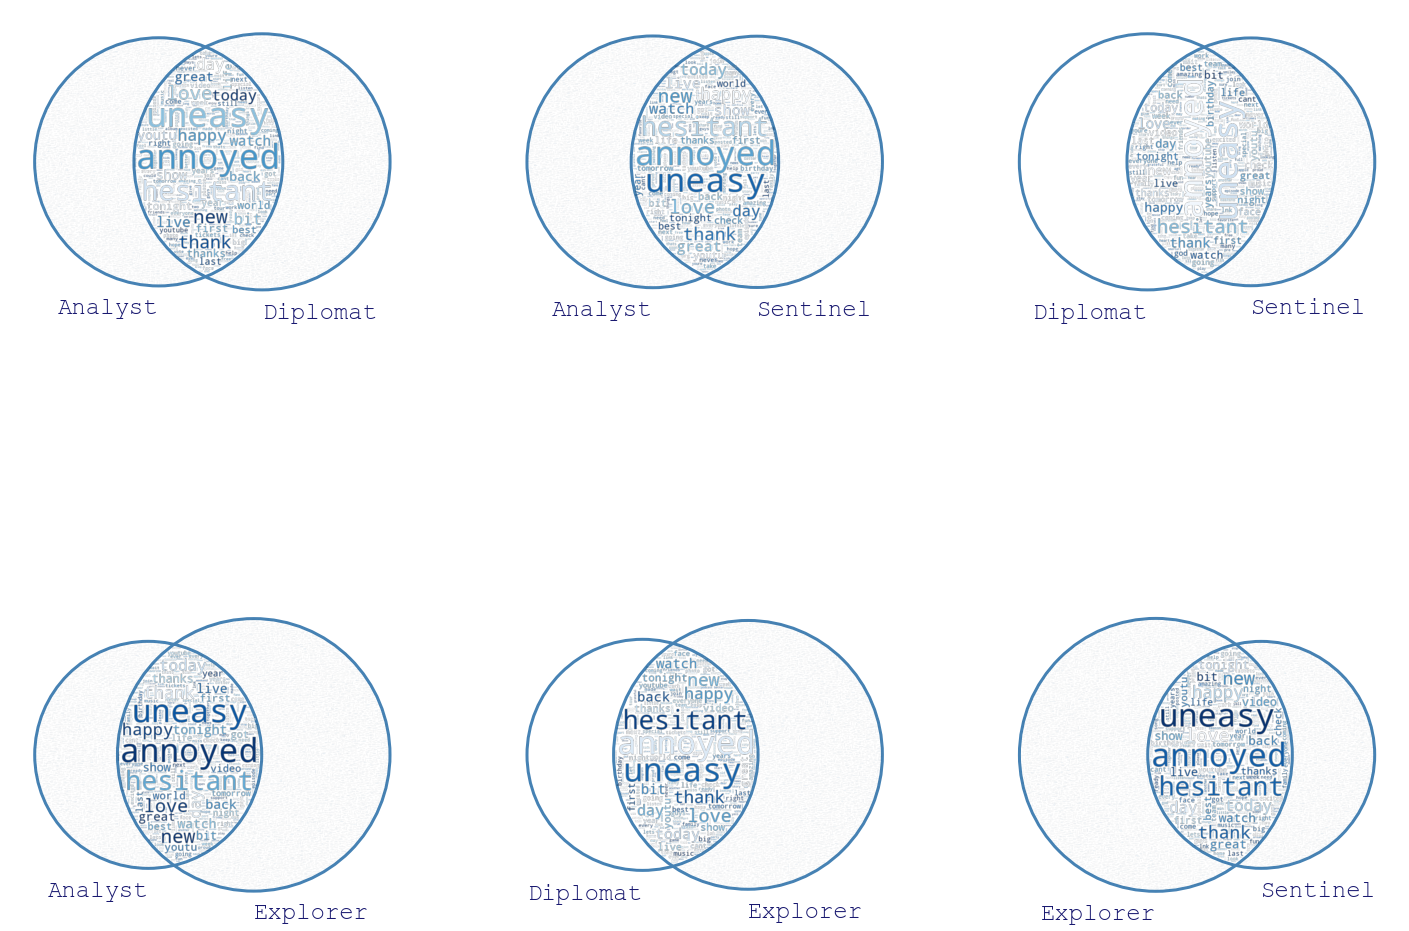

In [22]:
# plt.style.use('ggplot')

vennfigsize=(25,20)
 
   
fig, axes = plt.subplots(ncols=3, nrows=2,figsize=vennfigsize)



axcol=0
axrow=0
for enum,c in enumerate(combos):
    ax=axes[axcol,axrow]
    name_a=c[0]
    name_b=c[1]
    dfa=domains[domains.domain==name_a]
    dfb=domains[domains.domain==name_b]
    set_a=(dfa.uniqueCorpus.values[0])
    set_b=(dfb.uniqueCorpus.values[0])

    sym=set_a.symmetric_difference(set_b)
    union=set_a.union(set_b)
    intersection=set_a.intersection(set_b)
    multiset_a=str(','.join(dfa.lemmatized.values)).strip().replace('[',']').replace(']','').replace("'",'').replace('"','').strip().split()
    multiset_a=multiset_a[0].split(',')
    multiset_b=str(','.join(dfb.lemmatized.values)).strip().replace('[',']').replace(']','').replace("'",'').replace('"','').strip().split()
    multiset_b=multiset_b[0].split(',')

    # multiset_b
    # multiset_a

    combinedset=[]

    combinedset.extend(i.replace('"','').strip().replace("'",'') for i in (str(','.join(multiset_a+multiset_b)).split()))
    combinedset=combinedset[0].split(',')


    len(combinedset)
    # combinedmultiset=[a for a in [i.strip('"').strip("'").strip(']').strip('[').strip() for i in combinedmultiset] if (len(a)>1 and type(a)==str)]
    k=name_a
    kplus1=name_b










    kfreq=dict(zip(pd.Series(multiset_a).value_counts().index.tolist(),pd.Series(multiset_a).value_counts().values.tolist()))
    kplus1freq=dict(zip(pd.Series(multiset_b).value_counts().index.tolist(),(pd.Series(multiset_b).value_counts().values.tolist())))

    kthset=set_a
    kthplus1set=set_b
    # inter=kthplus1set&kthset
    # union=kthplus1set|kthset
    # sym=kthplus1set.symmetric_difference(kthset)


    combinedfreq=dict(zip(list(pd.Series(combinedset).value_counts().index),list(pd.Series(combinedset).value_counts().values)))

    # kplus1freq
    # kfreq
    # combinedfreq


    



    totalwords=int(dfa.corpusLen.values[0]+dfb.corpusLen.values[0])



    interfreq=[]
    for i in list(intersection):
        interfreq.append(combinedfreq.get(i))
    interfreq=(sum(interfreq))
    
    

    if len(sym)>0:
        disimularfreq=[]
        for i in list(sym):
        
            c=combinedfreq.get(i)
            if type(c)==None:
                print(c)    
            disimularfreq.append(int(c))
    disimularfreq=sum(disimularfreq)


    unique_to_k=kthset-kthplus1set

    if len(unique_to_k)>0:
        c=combinedfreq.get(i)
        if type(c)==None:
                print(c)   

        unique_k_freq=[]  
        for i in list(unique_to_k):    
            unique_k_freq.append(int(kfreq.get(i)))
        unique_k_freq=sum(unique_k_freq)


    unique_to_k_plus_1=kthplus1set-kthset


    unique_to_k_plus_1_freq=[]
    for i in unique_to_k_plus_1:    
        unique_to_k_plus_1_freq.append(int(kplus1freq.get(i)))
    unique_to_k_plus_1_freq=sum(unique_to_k_plus_1_freq)
    
    kthinterfreq=[]
    for i in list(intersection):    
            kthinterfreq.append(int(kfreq.get(i)))
    kthinterfreq=sum(kthinterfreq)


    kplus1freqinterfreq=[]
    for i in list(intersection):    
            kplus1freqinterfreq.append(int(kplus1freq.get(i)))
    kplus1freqinterfreq=sum(kplus1freqinterfreq)



















    wordcloud_kwargs={'colormap':'Blues','max_words':40000,'relative_scaling':.35}
    title=f'{k.capitalize()} vs {kplus1.capitalize()}'
    # [unionwithoutk.update(set(newdict.get(cop)))for cop in keyscopy]
    print(f'{"_":>2}'*45,f'\n\n{title:>60}\n\n',f'{"_":>2}'*45)
    print(f'\n\nintersection set length:\n{len(intersection)}')
    print(f'intersection frequency set length:\n{interfreq}')
    print(f'union set length:\n{len(union)}')
    print(f'union frequency set length:\n{totalwords}')
    print(f'intersection freq divided by union freq percent:\n{((interfreq)/(totalwords))*100:.2f}%')
    print(f'symmetric diff freq divided by union freq percent (words not in intersection):\n{((disimularfreq)/(totalwords))*100:.2f}%')
    print(f'unique to {k} freq:\n{((unique_k_freq)/(totalwords))*100:.2f}% ')
    print(f'unique to {kplus1} freq:\n{((unique_to_k_plus_1_freq)/(totalwords))*100:.2f}% ')
    print(f'Abs diff unique ratio from {k} and {kplus1}:\n{abs((unique_k_freq)/(totalwords)-(unique_to_k_plus_1_freq)/(totalwords))*100:.2f}% ')
    print(f'{k} freq contribution to intersection:\n{((kthinterfreq)/(interfreq))*100:.2f}% ')
    print(f'{kplus1} freq contribution to intersection:\n{((kplus1freqinterfreq)/(interfreq))*100:.2f}% ')

    venn2_wordcloud([kthset,kthplus1set], set_colors=['w','w'],set_edgecolors=['steelblue', 'steelblue'],ax=ax,set_labels=[f'{k.capitalize()}',f'{kplus1.capitalize()}'],word_to_frequency=combinedfreq,wordcloud_kwargs=wordcloud_kwargs,alpha=1,)#

    print('\n')
    print('\n')

    axcol+=1
    if axcol==2:
        
        axcol=0
        axrow+=1
    else:
        axrow=axrow

       
        




# plt.tight_layout()
plt.show()


